<a href="https://colab.research.google.com/github/rsnatorres/analise_dados_ramon/blob/main/2024_12_analise_mercado_imobiliario_itbi_bh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [ ]:
import pandas as pd
import numpy as np
import os

# Carregamento

Dados do ITBI são encontrados no sitio:
- https://dados.pbh.gov.br/dataset/itbi-relatorios

Dados de inflação no Sistema Gerador de Séries Temporais do BACEN

In [ ]:
directory = r'D:\OneDrive\DADOS\ITBI\dados_itbi'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

In [ ]:
dataframes = []

for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path, sep = ';')
    df.columns = df.columns.str.strip()
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464856 entries, 0 to 464855
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Endereco                           464856 non-null  object 
 1   Bairro                             464856 non-null  object 
 2   Ano de Construcao Unidade          452506 non-null  float64
 3   Area Terreno Total                 464856 non-null  object 
 4   Area Construida Adquirida          464856 non-null  object 
 5   Area Adquirida Unidades Somadas    452506 non-null  object 
 6   Padrao Acabamento Unidade          452506 non-null  object 
 7   Fracao Ideal Adquirida             464856 non-null  object 
 8   Tipo Construtivo Preponderante     464856 non-null  object 
 9   Descricao Tipo Ocupacao Unidade    452506 non-null  object 
 10  Valor Declarado                    464856 non-null  object 
 11  Valor Base Calculo                 4648

In [ ]:
df.head(2)

,Endereco,Bairro,Ano de Construcao Unidade,Area Terreno Total,Area Construida Adquirida,Area Adquirida Unidades Somadas,Padrao Acabamento Unidade,Fracao Ideal Adquirida,Tipo Construtivo Preponderante,Descricao Tipo Ocupacao Unidade,Valor Declarado,Valor Base Calculo,Zona Uso ITBI,Data Quitacao Transacao,Ano de Construcao (Unidade),Area Adquirida (Unidades Somadas),Padrao Acabamento (Unidade),Descrição Tipo Ocupacao (Unidade),Zona Uso,Data Quitacao
0,AVE AFONSO PENA 3924 - GARAGE 60 - CRUZEIRO - ...,CRUZEIRO,1976.0,"1.119,00","28,53","28,53",P3,"0,00447",VC,NAO RESIDENCIAL,"1.000,00","11.411,56",ZA,02/01/2008,NaN,NaN,NaN,NaN,NaN,NaN
1,AVE AMAZONAS 718 - APT 704 - CENTRO - 30180-00...,CENTRO,1960.0,"1.030,00","126,99","126,99",P2,"0,007197",AP,RESIDENCIAL,"85.000,00","85.000,00",ZHIP,02/01/2008,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Endereco', 'Bairro', 'Ano de Construcao Unidade', 'Area Terreno Total',
       'Area Construida Adquirida', 'Area Adquirida Unidades Somadas',
       'Padrao Acabamento Unidade', 'Fracao Ideal Adquirida',
       'Tipo Construtivo Preponderante', 'Descricao Tipo Ocupacao Unidade',
       'Valor Declarado', 'Valor Base Calculo', 'Zona Uso ITBI',
       'Data Quitacao Transacao', 'Ano de Construcao (Unidade)',
       'Area Adquirida (Unidades Somadas)', 'Padrao Acabamento (Unidade)',
       'Descrição Tipo Ocupacao (Unidade)', 'Zona Uso', 'Data Quitacao'],
      dtype='object')

# Transformações

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.columns

Index(['endereco', 'bairro', 'ano_de_construcao_unidade', 'area_terreno_total',
       'area_construida_adquirida', 'area_adquirida_unidades_somadas',
       'padrao_acabamento_unidade', 'fracao_ideal_adquirida',
       'tipo_construtivo_preponderante', 'descricao_tipo_ocupacao_unidade',
       'valor_declarado', 'valor_base_calculo', 'zona_uso_itbi',
       'data_quitacao_transacao', 'ano_de_construcao_(unidade)',
       'area_adquirida_(unidades_somadas)', 'padrao_acabamento_(unidade)',
       'descrição_tipo_ocupacao_(unidade)', 'zona_uso', 'data_quitacao'],
      dtype='object')

In [ ]:
df['data_quitacao'], df['data_quitacao_transacao']

(0                NaN
 1                NaN
 2                NaN
 3                NaN
 4                NaN
              ...    
 464851    29/11/2024
 464852    29/11/2024
 464853    30/11/2024
 464854    30/11/2024
 464855    30/11/2024
 Name: data_quitacao, Length: 464856, dtype: object,
 0         02/01/2008
 1         02/01/2008
 2         02/01/2008
 3         02/01/2008
 4         02/01/2008
              ...    
 464851           NaN
 464852           NaN
 464853           NaN
 464854           NaN
 464855           NaN
 Name: data_quitacao_transacao, Length: 464856, dtype: object)

In [ ]:
df['padrao_acabamento_unidade'] = df['padrao_acabamento_unidade'].combine_first(df['padrao_acabamento_(unidade)'])
df['zona_uso_itbi'] = df['zona_uso_itbi'].combine_first(df['zona_uso'])
df['descricao_tipo_ocupacao_unidade'] = df['descricao_tipo_ocupacao_unidade'].combine_first(df['descrição_tipo_ocupacao_(unidade)'])
df['data_quitacao'] = df['data_quitacao'].combine_first(df['data_quitacao_transacao'])
df['area_adquirida_unidades_somadas'] = df['area_adquirida_unidades_somadas'].combine_first(df['area_adquirida_(unidades_somadas)'])

In [ ]:
df = df.drop(columns=['padrao_acabamento_(unidade)', 'zona_uso',
                      'descrição_tipo_ocupacao_(unidade)', 'data_quitacao_transacao',
                     'area_adquirida_(unidades_somadas)'])

In [ ]:
df.head(2)

,endereco,bairro,ano_de_construcao_unidade,area_terreno_total,area_construida_adquirida,area_adquirida_unidades_somadas,padrao_acabamento_unidade,fracao_ideal_adquirida,tipo_construtivo_preponderante,descricao_tipo_ocupacao_unidade,valor_declarado,valor_base_calculo,zona_uso_itbi,ano_de_construcao_(unidade),data_quitacao
0,AVE AFONSO PENA 3924 - GARAGE 60 - CRUZEIRO - ...,CRUZEIRO,1976.0,"1.119,00","28,53","28,53",P3,"0,00447",VC,NAO RESIDENCIAL,"1.000,00","11.411,56",ZA,NaN,02/01/2008
1,AVE AMAZONAS 718 - APT 704 - CENTRO - 30180-00...,CENTRO,1960.0,"1.030,00","126,99","126,99",P2,"0,007197",AP,RESIDENCIAL,"85.000,00","85.000,00",ZHIP,NaN,02/01/2008


In [ ]:
for col in ['area_terreno_total', 'area_construida_adquirida',
            'area_adquirida_unidades_somadas', 'fracao_ideal_adquirida',
            'valor_declarado', 'valor_base_calculo']:
    print(col)
    df[col] = pd.to_numeric(df[col].str.replace('.', '').str.replace(',','.'), errors = 'coerce')

area_terreno_total
area_construida_adquirida
area_adquirida_unidades_somadas
fracao_ideal_adquirida
valor_declarado
valor_base_calculo


In [ ]:
import unicodedata

In [ ]:
def normalize_text(text):
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')
    text = text.lower().strip()
    return text

In [ ]:
df['descricao_tipo_ocupacao_unidade'].isnull().value_counts()

descricao_tipo_ocupacao_unidade
False    464856
Name: count, dtype: int64

In [ ]:
for col in ['endereco', 'bairro', 'padrao_acabamento_unidade', 'tipo_construtivo_preponderante',
           'descricao_tipo_ocupacao_unidade',
            'zona_uso_itbi']:
    print(col)
    df[col] = df[col].apply(normalize_text)

endereco
bairro
padrao_acabamento_unidade
tipo_construtivo_preponderante
descricao_tipo_ocupacao_unidade
zona_uso_itbi


In [ ]:
df['data_quitacao'] = pd.to_datetime(df['data_quitacao'], format = '%d/%m/%Y')

In [ ]:
df['mes_ano'] = df['data_quitacao'].dt.strftime('%m-%Y')

In [ ]:
len(df)

464856

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464856 entries, 0 to 464855
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   endereco                         464856 non-null  object        
 1   bairro                           464856 non-null  object        
 2   ano_de_construcao_unidade        452506 non-null  float64       
 3   area_terreno_total               464856 non-null  float64       
 4   area_construida_adquirida        464856 non-null  float64       
 5   area_adquirida_unidades_somadas  464856 non-null  float64       
 6   padrao_acabamento_unidade        464856 non-null  object        
 7   fracao_ideal_adquirida           464856 non-null  float64       
 8   tipo_construtivo_preponderante   464856 non-null  object        
 9   descricao_tipo_ocupacao_unidade  464856 non-null  object        
 10  valor_declarado                  464856 non-

In [ ]:
df['ano'] = df['data_quitacao'].dt.year

In [ ]:
df['ano'].value_counts().sort_index()

ano
2008    36935
2009    33356
2010    34643
2011    31596
2012    30005
2013    30976
2014    10905
2015    28858
2016    25861
2017    21394
2018    22258
2019    23965
2020    22779
2021    33490
2022    26725
2023    25784
2024    25326
Name: count, dtype: int64

In [ ]:
len(df.query("ano == 2014")) # tem algum problema com os dados de 2014 # já reportei à PBH

10905

In [ ]:
df_ap = df[df['tipo_construtivo_preponderante'] == 'ap']
len(df_ap)

311797

In [ ]:
df_ap['ano'].value_counts().sort_index()

ano
2008    21166
2009    19509
2010    21453
2011    19805
2012    19575
2013    21195
2014     7654
2015    19267
2016    17447
2017    14344
2018    15010
2019    16315
2020    16479
2021    25106
2022    19552
2023    19018
2024    18902
Name: count, dtype: int64

## Deflacionamento

In [ ]:
ipca = pd.read_csv('ipca/ipca_mensal_bacen.csv',
               sep=';', decimal=',', header=0, encoding='latin1')
ipca.drop(ipca.tail(1).index, inplace=True) # dropando a fonte
ipca.rename(columns={'Data': 'data',
        '433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal': 'ipca'},
    inplace=True)
ipca['data'] = pd.to_datetime(ipca['data'], format = '%m/%Y')
ipca['ipca'] = pd.to_numeric(ipca['ipca'].str.replace(',','.'))/100
# DEFINIR A DATA BASE --------------------------------------------------------
#ipca = ipca[ipca['data'] < '2024']
# chave para depois mergiar
ipca['mes/ano'] = ipca['data'].dt.strftime('%m/%Y')
# preparando para utilizar cumulative product
ipca['ipca_1'] = ipca['ipca'] + 1
# cumulative product
ipca['ipca_cumprod'] = ipca['ipca_1'].cumprod().round(4)
# building the index --> para valores a preços presentes (ultima obs)
ipca['multiplier'] = (ipca['ipca_cumprod'].iloc[-1]/ipca['ipca_cumprod']).round(2)

In [ ]:
ipca['mes_ano'] = ipca['data'].dt.strftime('%m-%Y')

In [ ]:
ipca

,data,ipca,mes/ano,ipca_1,ipca_cumprod,multiplier,mes_ano
0,2000-01-01,0.0062,01/2000,1.0062,1.0062,4.42,01-2000
1,2000-02-01,0.0013,02/2000,1.0013,1.0075,4.41,02-2000
2,2000-03-01,0.0022,03/2000,1.0022,1.0097,4.40,03-2000
3,2000-04-01,0.0042,04/2000,1.0042,1.0140,4.39,04-2000
4,2000-05-01,0.0001,05/2000,1.0001,1.0141,4.38,05-2000
...,...,...,...,...,...,...,...
294,2024-07-01,0.0038,07/2024,1.0038,4.3863,1.01,07-2024
295,2024-08-01,-0.0002,08/2024,0.9998,4.3855,1.01,08-2024
296,2024-09-01,0.0044,09/2024,1.0044,4.4047,1.01,09-2024
297,2024-10-01,0.0056,10/2024,1.0056,4.4294,1.00,10-2024


In [ ]:
ipca.query("mes_ano == '01-2010'")

,data,ipca,mes/ano,ipca_1,ipca_cumprod,multiplier,mes_ano
120,2010-01-01,0.0075,01/2010,1.0075,1.9138,2.32,01-2010


In [ ]:
df['mes_ano'].dtype, ipca['mes_ano'].dtype

(dtype('O'), dtype('O'))

In [ ]:
df = df.merge(ipca[['mes_ano', 'multiplier']], on='mes_ano', how='left')

In [ ]:
df[['mes_ano', 'valor_base_calculo', 'multiplier']]

,mes_ano,valor_base_calculo,multiplier
0,01-2008,11411.56,2.57
1,01-2008,85000.00,2.57
2,01-2008,121500.00,2.57
3,01-2008,13500.00,2.57
4,01-2008,10354.49,2.57
...,...,...,...
464851,11-2024,1218765.93,1.00
464852,11-2024,200000.00,1.00
464853,11-2024,279384.82,1.00
464854,11-2024,470000.00,1.00


In [ ]:
df['valor_base_def'] = df['valor_base_calculo']*df['multiplier']

Metro quadrado deflacionado

In [ ]:
# quem vai ser a área sobre a qual vamos dividir o valor total
df[['area_construida_adquirida', 'area_adquirida_unidades_somadas', 'area_terreno_total']]
#df['area_adquirida_unidades_somadas'] = df['area_adquirida_unidades_somadas'].combine_first(df['area_adquirida_(unidades_somadas)'])

,area_construida_adquirida,area_adquirida_unidades_somadas,area_terreno_total
0,28.53,28.53,1119.00
1,126.99,126.99,1030.00
2,135.55,135.55,544.00
3,11.45,11.45,544.00
4,25.20,25.20,4426.00
...,...,...,...
464851,278.83,278.83,1556.00
464852,49.56,49.56,4051.71
464853,80.02,80.02,720.00
464854,89.25,89.25,477.50


In [ ]:
# tem que tirar esses com área proxima de zero se não dá valor por metro quadrado infinito
df['area_construida_adquirida'].describe()

count    464856.000000
mean        120.878911
std         323.862827
min           0.000000
25%          53.100000
50%          88.670000
75%         146.770000
max       74745.250000
Name: area_construida_adquirida, dtype: float64

In [ ]:
df['area_adquirida_unidades_somadas'].describe()

count    464856.000000
mean        117.722249
std         237.097232
min           0.000000
25%          53.020000
50%          88.710000
75%         146.470000
max       74745.250000
Name: area_adquirida_unidades_somadas, dtype: float64

In [ ]:
df['valor_m2_area_const_def'] = df['valor_base_def']/df['area_construida_adquirida']
df['valor_m2_area_adq_def'] = df['valor_base_def']/df['area_adquirida_unidades_somadas']

In [ ]:
df['valor_m2_area_const_def'].describe()

count    4.648560e+05
mean              inf
std               NaN
min      2.367610e+00
25%      3.492124e+03
50%      4.654713e+03
75%      5.994906e+03
max               inf
Name: valor_m2_area_const_def, dtype: float64

In [ ]:
df['valor_m2_area_adq_def'].describe()

count    4.648560e+05
mean              inf
std               NaN
min      1.709367e+01
25%      3.487194e+03
50%      4.657025e+03
75%      6.016233e+03
max               inf
Name: valor_m2_area_adq_def, dtype: float64

# Estudo

In [ ]:
len(df)

464856

In [ ]:
len(df.query("bairro == 'salgado filho'"))

3214

In [ ]:
# usar para pesquisar bairros que temos duvida da string
df[df['bairro'].str.contains('guti')]['bairro'].value_counts()

bairro
gutierrez    5879
Name: count, dtype: int64

In [ ]:
regiao_direta = ['estoril', 'buritis',
                 'havai', 'sao bento',
                 'jardim america', 'santa lucia'
                 # 'estrela dalva', não tem
                ]

regiao_indireta = ['olhos d agua', 'belvedere', 'salgado filho',
                   'cinquentenario', 'marajo', 'parque sao jose',
                   'nova granada', 'gurierrez', 'luxemburgo',
                   'santo antonio', 'sion'
                  ]

In [ ]:
regiao_direta = [normalize_text(bairro) for bairro in regiao_direta]
regiao_indireta = [normalize_text(bairro) for bairro in regiao_indireta]
lista_bairros = regiao_direta + regiao_indireta
#for bairro in lista_bairros:
#    bairro = normalize_text(bairro)
lista_bairros = [normalize_text(bairro) for bairro in lista_bairros]

In [ ]:
resto_belo_horizonte = list(set( list(df['bairro'].unique())) - set(regiao_direta) - set(regiao_indireta))

In [ ]:
conditions = [df['bairro'].isin(regiao_direta),
              df['bairro'].isin(regiao_indireta),
              df['bairro'].isin(resto_belo_horizonte)]
values = ['regiao_direta', 'regiao_indireta', 'resto_bh']
df['regiao'] = np.select(conditions, values)

In [ ]:
df['regiao'].value_counts()

regiao
resto_bh           387117
regiao_direta       43032
regiao_indireta     34707
Name: count, dtype: int64

Analysis

In [ ]:
df['tipo_construtivo_preponderante'].value_counts(normalize=True)

tipo_construtivo_preponderante
ap    0.670739
ca    0.117998
sl    0.057067
lv    0.046184
vc    0.033875
lj    0.031203
vr    0.015818
ba    0.011989
gp    0.007660
ac    0.005483
cc    0.001678
bc    0.000247
vv    0.000039
-3    0.000019
Name: proportion, dtype: float64

## Filter

In [ ]:
df.columns

Index(['endereco', 'bairro', 'ano_de_construcao_unidade', 'area_terreno_total',
       'area_construida_adquirida', 'area_adquirida_unidades_somadas',
       'padrao_acabamento_unidade', 'fracao_ideal_adquirida',
       'tipo_construtivo_preponderante', 'descricao_tipo_ocupacao_unidade',
       'valor_declarado', 'valor_base_calculo', 'zona_uso_itbi',
       'ano_de_construcao_(unidade)', 'data_quitacao', 'mes_ano', 'ano',
       'multiplier', 'valor_base_def', 'valor_m2_area_const_def',
       'valor_m2_area_adq_def', 'regiao'],
      dtype='object')

In [ ]:
df['tipo_construtivo_preponderante'].value_counts(normalize=True)

tipo_construtivo_preponderante
ap    0.670739
ca    0.117998
sl    0.057067
lv    0.046184
vc    0.033875
lj    0.031203
vr    0.015818
ba    0.011989
gp    0.007660
ac    0.005483
cc    0.001678
bc    0.000247
vv    0.000039
-3    0.000019
Name: proportion, dtype: float64

In [ ]:
df = df.loc[(df['tipo_construtivo_preponderante'].isin(['ap', 'ca'])) &
             #(df['data_quitacao'] > '2018') &
             (df['area_construida_adquirida'] > 10) & # ou area_adquirida_unidades_somadas
             (df['area_construida_adquirida'] < 360) &
             (df['valor_m2_area_const_def'] > 200) &
             (df['valor_m2_area_const_def'] < 50000)].copy()

In [ ]:
len(df), len(df)

(357634, 357634)

In [ ]:
df['regiao'].value_counts()

regiao
resto_bh           299011
regiao_direta       32785
regiao_indireta     25838
Name: count, dtype: int64

In [ ]:
df['tipo_construtivo_preponderante'].value_counts(normalize=True)

tipo_construtivo_preponderante
ap    0.856199
ca    0.143801
Name: proportion, dtype: float64

## Stats

In [ ]:
def per_25(g):
    return np.percentile(g, 25)
def per_75(g):
    return np.percentile(g, 75)

### area

In [ ]:
area_stats = df.pivot_table(
                index= ['tipo_construtivo_preponderante', 'regiao'],
                values = 'area_construida_adquirida',
                aggfunc = ['count', 'mean', 'std', 'min', per_25, 'median', per_75, 'max']).round(0)
area_stats

count  \
                                               area_construida_adquirida   
tipo_construtivo_preponderante regiao                                      
ap                             regiao_direta                       31323   
                               regiao_indireta                     24547   
                               resto_bh                           250336   
ca                             regiao_direta                        1462   
                               regiao_indireta                      1291   
                               resto_bh                            48675   

                                                                    mean  \
                                               area_construida_adquirida   
tipo_construtivo_preponderante regiao                                      
ap                             regiao_direta                       141.0   
                               regiao_indireta                     151.0   
                               resto_bh                            109.0   
ca                             regiao_direta                       166.0   
                               regiao_indireta                     178.0   
                               resto_bh                            140.0   

                                                                     std  \
                                               area_construida_adquirida   
tipo_construtivo_preponderante regiao                                      
ap                             regiao_direta                        64.0   
                               regiao_indireta                      75.0   
                               resto_bh                             60.0   
ca                             regiao_direta                        94.0   
                               regiao_indireta                      92.0   
                               resto_bh                             80.0   

                                                                     min  \
                                               area_construida_adquirida   
tipo_construtivo_preponderante regiao                                      
ap                             regiao_direta                        10.0   
                               regiao_indireta                      10.0   
                               resto_bh                             10.0   
ca                             regiao_direta                        13.0   
                               regiao_indireta                      11.0   
                               resto_bh                             10.0   

                                                                  per_25  \
                                               area_construida_adquirida   
tipo_construtivo_preponderante regiao                                      
ap                             regiao_direta                        86.0   
                               regiao_indireta                      91.0   
                               resto_bh                             64.0   
ca                             regiao_direta                        89.0   
                               regiao_indireta                     104.0   
                               resto_bh                             73.0   

                                                                  median  \
                                               area_construida_adquirida   
tipo_construtivo_preponderante regiao                                      
ap                             regiao_direta                       134.0   
                               regiao_indireta                     136.0   
                               resto_bh                             93.0   
ca                             regiao_direta                       133.0   
                               regiao_indireta                     176.0   
                               res

In [ ]:
area_stats.to_excel('stats_area.xlsx')

### m2

In [ ]:
valor_m2_construido_stats = df[df['valor_m2_area_const_def'].notnull()].pivot_table(
                index= ['tipo_construtivo_preponderante', 'regiao'],
                values = 'valor_m2_area_const_def',
                aggfunc = ['count', 'mean', 'std', 'min', per_25, 'median', per_75, 'max']).round(0)
valor_m2_construido_stats

count  \
                                               valor_m2_area_const_def   
tipo_construtivo_preponderante regiao                                    
ap                             regiao_direta                     31323   
                               regiao_indireta                   24547   
                               resto_bh                         250336   
ca                             regiao_direta                      1462   
                               regiao_indireta                    1291   
                               resto_bh                          48675   

                                                                  mean  \
                                               valor_m2_area_const_def   
tipo_construtivo_preponderante regiao                                    
ap                             regiao_direta                    4618.0   
                               regiao_indireta                  5271.0   
                               resto_bh                         4752.0   
ca                             regiao_direta                    5250.0   
                               regiao_indireta                  5759.0   
                               resto_bh                         4014.0   

                                                                   std  \
                                               valor_m2_area_const_def   
tipo_construtivo_preponderante regiao                                    
ap                             regiao_direta                    1345.0   
                               regiao_indireta                  1830.0   
                               resto_bh                         1681.0   
ca                             regiao_direta                    2802.0   
                               regiao_indireta                  4139.0   
                               resto_bh                         2656.0   

                                                                   min  \
                                               valor_m2_area_const_def   
tipo_construtivo_preponderante regiao                                    
ap                             regiao_direta                     501.0   
                               regiao_indireta                   253.0   
                               resto_bh                          246.0   
ca                             regiao_direta                     592.0   
                               regiao_indireta                   402.0   
                               resto_bh                          246.0   

                                                                per_25  \
                                               valor_m2_area_const_def   
tipo_construtivo_preponderante regiao                                    
ap                             regiao_direta                    3748.0   
                               regiao_indireta                  4038.0   
                               resto_bh                         3669.0   
ca                             regiao_direta                    3176.0   
                               regiao_indireta                  3042.0   
                               resto_bh                         2266.0   

                                                                median  \
                                               valor_m2_area_const_def   
tipo_construtivo_preponderante regiao                                    
ap                             regiao_direta                    4540.0   
                               regiao_indireta                  5075.0   
                               resto_bh                         4611.0   
ca                             regiao_direta                    4815.0   
                               regiao_indireta                  4797.0   
                               resto_bh                         3547.0   

                                                               

In [ ]:
valor_m2_construido_stats.to_excel('valor_m2_construido_stats.xlsx')

###

### PA

In [ ]:
pa_stats = df.pivot_table(index=['tipo_construtivo_preponderante', 'regiao'],
                           values = 'endereco',
                           columns = 'padrao_acabamento_unidade',
                           aggfunc= 'count')
pa_stats

padrao_acabamento_unidade                           p1       p2        p3  \
tipo_construtivo_preponderante regiao                                       
ap                             regiao_direta       2.0    631.0   16478.0   
                               regiao_indireta    29.0   1373.0   12487.0   
                               resto_bh         2065.0  36897.0  151629.0   
ca                             regiao_direta      32.0    305.0     623.0   
                               regiao_indireta    51.0    433.0     632.0   
                               resto_bh         3284.0  17439.0   25629.0   

padrao_acabamento_unidade                            p4      p5   te  
tipo_construtivo_preponderante regiao                                 
ap                             regiao_direta    13210.0  1002.0  NaN  
                               regiao_indireta   8434.0  2224.0  NaN  
                               resto_bh         51829.0  7916.0  NaN  
ca                             regiao_direta      455.0    47.0  NaN  
                               regiao_indireta    167.0     8.0  NaN  
                               resto_bh          2222.0    99.0  2.0

In [ ]:
pa_stats.to_excel('pa_stats.xlsx')

In [ ]:
df['tipo_construtivo_preponderante'].value_counts()

tipo_construtivo_preponderante
ap    306206
ca     51428
Name: count, dtype: int64

# Visualização

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para alterar datas no eixo
from matplotlib.dates import DateFormatter # Para alterar o formato da data
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [ ]:
# Funções para alterar a forma de exposição dos valores no gráfico
def currency_eixo(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = 'R${:4.0f}'.format(x*1e-3) # {:<width>.<prec><type>}
    else:
        s = 'R${:4.0f}'.format(x*1e-3)
    return s
def porcentagem_eixo(x, pos):
    s = '{:4.0f}%'.format(x)
    return s
# ou aplicar diretamente: lambda x, pos: '{:4.0f}%'.format(x)
def formatar_reais(x, pos):
    s = 'R$ {:,.0f}'.format(x).replace(',', '.')
    return s
def formatar_reais_e_centavos(x):
    s = 'R$ {:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.')
    return s
def formatar_milhares(x, pos):
    s = '{:4.0f}'.format(x*1e-3)
def formatar_milhares_reais(x, pos):
    """Format large numbers in millions with 'R$'."""
    s = f"R$ {x * 1e-3:,.0f}"  # Convert to millions and format with a comma as thousands separator
    return s
def formatar_milhoes(x, pos):
    s = '{:4.0f}'.format(x*1e-6)
def formatar_milhoes_reais(x, pos):
    """Format large numbers in millions with 'R$'."""
    s = f"R$ {x * 1e-6:,.0f}"  # Convert to millions and format with a comma as thousands separator
    return s
def formatar_bilhoes(x, pos):
    s = '{:4.2f}B'.format(x*1e-9)
    return s
def formatar_ano(x, pos):
    return '{:4.0f}'.format(x)
def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

In [ ]:
print(plt.style.available)
plt.style.use('seaborn-v0_8') # ggplot também é bom

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


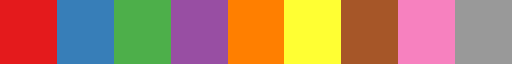

In [ ]:
plt.rc('figure', figsize=(6,3), titlesize=15)
plt.rc('lines', linewidth=2)
plt.rc('axes', labelsize=10, titlesize=8, titleweight='bold', titley=1.05, labelpad=6, labelweight='bold') # vai mudar do x e do y
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', loc='lower center', fontsize=9, frameon=True, framealpha=0.8)
colors = plt.colormaps.get_cmap('Set1') # bom para qualitativo
plt.colormaps.get_cmap('Set1') # melhor porque distingue melhor as primeiras cores

## Local

In [ ]:
tab_preco_tempo = df.pivot_table(index = 'mes_ano',
                                  values = 'valor_m2_area_const_def',
                                  columns = 'regiao',
                                  aggfunc = 'mean')
tab_preco_tempo.reset_index(inplace=True)
tab_preco_tempo['mes_ano'] = pd.to_datetime(tab_preco_tempo['mes_ano'], format = '%m-%Y')
tab_preco_tempo.sort_values(by='mes_ano', inplace=True)

In [ ]:
tab_preco_tempo

regiao,mes_ano,regiao_direta,regiao_indireta,resto_bh
0,2008-01-01,2745.221155,2824.017316,2493.160746
17,2008-02-01,2639.748751,2884.979679,2500.823543
34,2008-03-01,2667.710124,3207.742221,2569.483212
51,2008-04-01,2663.948709,3326.764065,2524.153356
68,2008-05-01,2796.581656,3311.149460,2664.160781
...,...,...,...,...
118,2024-07-01,4415.422673,4821.251090,4410.090634
135,2024-08-01,4468.487979,5100.016598,4480.382289
152,2024-09-01,4896.268643,5245.943581,4575.073593
169,2024-10-01,4927.725873,5327.394433,4773.337073


In [ ]:
tab_preco_tempo['regiao_direta_ma'] = tab_preco_tempo['regiao_direta'].rolling(window=3).mean()
tab_preco_tempo['regiao_indireta_ma'] = tab_preco_tempo['regiao_indireta'].rolling(window=3).mean()
tab_preco_tempo['resto_bh_ma'] = tab_preco_tempo['resto_bh'].rolling(window=3).mean()

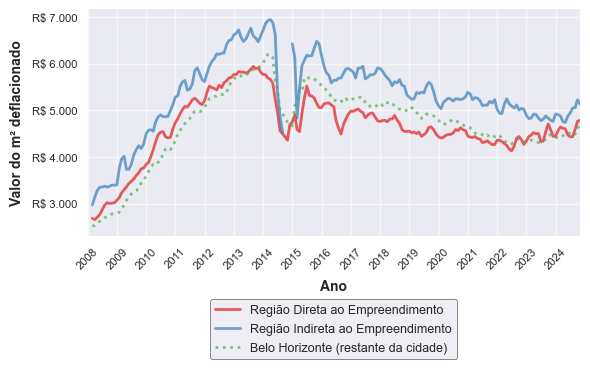

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

colors = plt.cm.Set1(range(len(tab_preco_tempo)))  # Use Set1 colormap for colors

ax.plot(tab_preco_tempo['mes_ano'], tab_preco_tempo['regiao_direta_ma'],
        label='Região Direta ao Empreendimento',
        color=colors[0], alpha=0.7)
ax.plot(tab_preco_tempo['mes_ano'], tab_preco_tempo['regiao_indireta_ma'],
        label='Região Indireta ao Empreendimento',
        color=colors[1], alpha=0.7)
ax.plot(tab_preco_tempo['mes_ano'], tab_preco_tempo['resto_bh_ma'],
        label='Belo Horizonte (restante da cidade)',
        color=colors[2], alpha=0.7, linestyle = ':')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # %b, %m, %-m
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_major_locator(mdates.YearLocator(base=1, month=1, day=1))
ax.yaxis.set_major_formatter(formatar_reais)


ax.set_xlim(tab_preco_tempo['mes_ano'].min(), tab_preco_tempo['mes_ano'].max())

ax.set_ylabel('Valor do m² deflacionado')
ax.set_xlabel('Ano')
#ax.set_title('Evolução dos Índices ao Longo do Tempo')
leg = ax.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=1#len(columns_to_plot)
               )
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.4)


ax.grid(which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
output_filename = 'preco_imoveis_local'
fig.savefig(f'{output_filename}.png', dpi=300, bbox_inches='tight')

## Mercado Imobiliário Geral

### Indices de Preco (Fipezap)

In [ ]:
indice_path = r'D:\OneDrive\DADOS\ITBI\imobiliario_geral\fipezap_export.csv'
# esse arquivo tem que ser gerado antes de acordo com as instruções da planilha de step-by-step

In [ ]:
indices = pd.read_csv(indice_path, sep=';', encoding='latin-1')

In [ ]:
indices.head()

,data,mes,ano,indice_preco_br,indice_preco_bh,incc
0,mai/09,5,2009,100,100,100
1,jun/09,6,2009,"101,5769594","100,3637326","100,7"
2,jul/09,7,2009,"103,3798088","101,7019112","100,96182"
3,ago/09,8,2009,"105,2626358","102,7644012","100,9113391"
4,set/09,9,2009,"107,0823728","104,6636845","101,0627061"


In [ ]:
indices['indice_preco_br'] = pd.to_numeric(indices['indice_preco_br'].str.replace(',','.'), errors='raise')
indices['indice_preco_bh'] = pd.to_numeric(indices['indice_preco_bh'].str.replace(',','.'), errors='raise')
indices['incc'] = pd.to_numeric(indices['incc'].str.replace(',','.'), errors='raise')

In [ ]:
indices.head()

,data,mes,ano,indice_preco_br,indice_preco_bh,incc
0,mai/09,5,2009,100.000000,100.000000,100.000000
1,jun/09,6,2009,101.576959,100.363733,100.700000
2,jul/09,7,2009,103.379809,101.701911,100.961820
3,ago/09,8,2009,105.262636,102.764401,100.911339
4,set/09,9,2009,107.082373,104.663685,101.062706


In [ ]:
indices['mes'] = indices['mes'].astype(str)
indices['ano'] = indices['ano'].astype(str)
indices['mes_ano'] = indices['mes'] + '-' + indices['ano']
indices['mes_ano'] = pd.to_datetime(indices['mes_ano'], format = '%m-%Y')

In [ ]:
indices.head(3)

,data,mes,ano,indice_preco_br,indice_preco_bh,incc,mes_ano
0,mai/09,5,2009,100.000000,100.000000,100.00000,2009-05-01
1,jun/09,6,2009,101.576959,100.363733,100.70000,2009-06-01
2,jul/09,7,2009,103.379809,101.701911,100.96182,2009-07-01


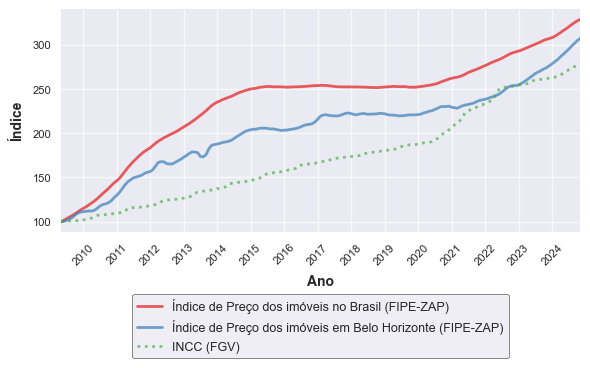

In [ ]:

fig, ax = plt.subplots(figsize=(6, 4))

columns_to_plot = ['indice_preco_br', 'indice_preco_bh', 'incc']
colors = plt.cm.Set1(range(len(columns_to_plot)))  # Use Set1 colormap for colors

ax.plot(indices['mes_ano'], indices['indice_preco_br'], label='Índice de Preço dos imóveis no Brasil (FIPE-ZAP)',
        color=colors[0], alpha=0.7)
ax.plot(indices['mes_ano'], indices['indice_preco_bh'],label='Índice de Preço dos imóveis em Belo Horizonte (FIPE-ZAP)',
        color=colors[1], alpha=0.7)
ax.plot(indices['mes_ano'], indices['incc'], label='INCC (FGV)',
        color=colors[2], alpha=0.7, linestyle = ':')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # %b, %m, %-m
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_major_locator(mdates.YearLocator(base=1, month=1, day=1))


ax.set_xlim(indices['mes_ano'].min(), indices['mes_ano'].max())

ax.set_ylabel('Índice')
ax.set_xlabel('Ano')
#ax.set_title('Evolução dos Índices ao Longo do Tempo')
leg = ax.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=1#len(columns_to_plot)
               )
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.4)


ax.grid(which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
output_filename = 'indices_preco'
fig.savefig(f'{output_filename}.png', dpi=300, bbox_inches='tight')

## Financiamento - ABECIP

In [ ]:
financiamento = r'D:\OneDrive\DADOS\ITBI\imobiliario_geral\abecip_export.csv'
# esse arquivo tem que ser gerado antes de acordo com as instruções da planilha de step-by-step

In [ ]:
fin = pd.read_csv(financiamento, sep=';')

In [ ]:
fin.drop([274,275], # nan
         inplace = True)

In [ ]:
fin['data'] = pd.to_datetime(fin['periodo'], format = '%d/%m/%Y')

In [ ]:
for col in ['unid_construcao', 'unid_aquisicao', 'unid_total',
       'vlr_construcao', 'vlr_aquisicao', 'vlr_total']:
    fin[col] = pd.to_numeric(fin[col].astype(str).str.replace('.','').str.replace(',','.'))

In [ ]:
fin

,periodo,unid_construcao,unid_aquisicao,unid_total,vlr_construcao,vlr_aquisicao,vlr_total,data
0,01/01/2002,2000,1455,1655,13.54,83.95,97.49,2002-01-01
1,01/02/2002,4830,1456,1939,32.12,96.12,128.24,2002-02-01
2,01/03/2002,1049,1522,2571,62.59,101.71,164.31,2002-03-01
3,01/04/2002,6840,1723,2407,44.42,108.15,152.57,2002-04-01
4,01/05/2002,5710,1536,2107,23.48,98.28,121.76,2002-05-01
...,...,...,...,...,...,...,...,...
269,01/06/2024,16799,33609,50408,4406.59,12569.95,16976.54,2024-06-01
270,01/07/2024,16469,37955,54424,3767.25,14207.54,17974.78,2024-07-01
271,01/08/2024,17616,35841,53457,4723.04,13665.05,18388.09,2024-08-01
272,01/09/2024,21839,36532,58371,4442.81,13177.11,17619.92,2024-09-01


In [ ]:
fin['ano'] = fin['data'].dt.year

In [ ]:
tab_fin = fin.pivot_table(index = 'ano',
                        values = ['unid_total', 'vlr_total'],
                        aggfunc = 'sum')
tab_fin.reset_index(inplace=True)
tab_fin.head()

,ano,unid_total,vlr_total
0,2002,28932,1770.16
1,2003,32916,2217.68
2,2004,43035,3002.25
3,2005,61123,4852.12
4,2006,93704,9340.29


In [ ]:
tab_fin['ano'] = pd.to_datetime(tab_fin['ano'], format = '%Y')

In [ ]:
tab_fin.head()

,ano,unid_total,vlr_total
0,2002-01-01,28932,1770.16
1,2003-01-01,32916,2217.68
2,2004-01-01,43035,3002.25
3,2005-01-01,61123,4852.12
4,2006-01-01,93704,9340.29


In [ ]:
tab_fin = tab_fin[tab_fin['ano'] >= '2009']

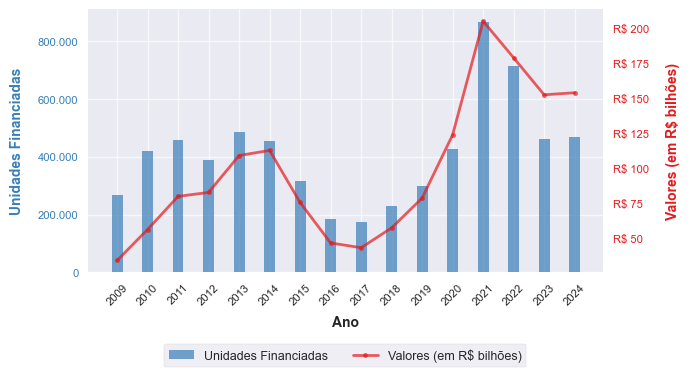

In [ ]:

fig, ax1 = plt.subplots(figsize=(7, 3.5))


colors = plt.cm.Set1(range(2))  # Adjusting to two variables


ax1.bar(tab_fin['ano'], tab_fin['unid_total'], width=130, label='Unidades Financiadas',
        color=colors[1], alpha=0.7)
ax1.set_ylabel('Unidades Financiadas', color=colors[1], labelpad=10)
ax1.tick_params(axis='y', labelcolor=colors[1])


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator(base=1, month=1, day=1))
ax1.xaxis.set_tick_params(rotation=45)

ax1.yaxis.set_major_formatter(format_thousands)
ax1.grid(which='major', axis='x', linestyle='-', alpha=0.7)  # Gridlines for x-axis
ax1.grid(which='major', axis='y', linestyle='-', alpha=0.7)  # Gridlines for y-axis (ax1)

ax1.set_xlabel('Ano')


ax2 = ax1.twinx()
ax2.plot(tab_fin['ano'], tab_fin['vlr_total'],  label='Valores (em R$ bilhões)',
         color=colors[0], alpha=0.7, marker='.')
ax2.set_ylabel('Valores (em R$ bilhões)', color=colors[0], labelpad=12)
ax2.tick_params(axis='y', labelcolor=colors[0])
ax2.yaxis.set_major_formatter(formatar_milhares_reais)


ax2.grid(False)


lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 0.02), loc='upper center', ncol=2)


plt.tight_layout()
plt.show()

In [ ]:
output_filename = 'financiamento'
fig.savefig(f'{output_filename}.png', dpi=300, bbox_inches='tight')